In [130]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import joblib

In [131]:
diamonds = pd.read_csv('diamonds_preprocessed.csv')
diamondsOG = pd.read_csv('diamonds_original.csv')

In [132]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,"(5000, 10000]",0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,"[0, 5000]",0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,"[0, 5000]",0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,"(5000, 10000]",0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,"[0, 5000]",0.066582
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,"[0, 5000]",0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,"[0, 5000]",0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,"[0, 5000]",0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,"[0, 5000]",0.080874


In [133]:
diamondsOG

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0


In [134]:
price_classes = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
feature_names = diamonds.columns.to_list()
feature_names.remove('class')
feature_names

['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [135]:
X = diamonds[feature_names]
y = diamonds['class']

In [136]:
X

,carat,clarity,color,cut,depth,table,x,y,z,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,0.066582
...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,0.080874


In [137]:
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
52325        [0, 5000]
52326        [0, 5000]
52327        [0, 5000]
52328        [0, 5000]
52329        [0, 5000]
Name: class, Length: 52330, dtype: object

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
all_predictions = []
accuracy_scores = []

***

Pomocne funkcije za izvestaj o modelu

In [139]:
def plot_predicted_probabilities(pipeline, X_test):
    probabilities = pipeline.predict_proba(X_test)
    classes = model.classes_

    fig, ax = plt.subplots()
    ax.bar(classes, np.max(probabilities, axis=0), color='#006400')
    ax.grid(alpha=0.5)
    ax.set_xlabel('Class')
    ax.set_ylabel('Probability')
    ax.set_xticks(classes)
    plt.show()

def model_report(pipeline, X_test, y_test):
  y_pred = pipeline.predict(X_test)
  model = pipeline['model']
  accuracy = accuracy_score(y_test, y_pred)
  all_predictions.append(y_pred)
  accuracy_scores.append(accuracy)

  print(f'Izvestaj o {type(model).__name__} modelu:')
  print('-------------------------------------------------------------------')
  print(f'Klase za predvidjanje: {price_classes}')
  print(f'Accuracy: {accuracy}')
  print('-------------------------------------------------------------------')
  print('Klasifikacioni izvestaj: ')
  print(classification_report(y_test, y_pred))
  print('-------------------------------------------------------------------')
  print('Matrica konfuzije: ')
  data = confusion_matrix(y_test, y_pred)
  _ = sns.heatmap(data, annot=True, fmt='g', xticklabels=model.classes_, yticklabels=model.classes_, cmap = plt.cm.Reds)



## CategoricalNB

In [140]:
cnb = Pipeline([
    ('model', CategoricalNB())
])

In [141]:
cnb.fit(X_train, y_train)

Pipeline(steps=[('model', CategoricalNB())])

Izvestaj o CategoricalNB modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.8361679087839989
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.74      0.06      0.12      1018
 (5000, 10000]       0.56      0.94      0.70      2802
        15000+       0.64      0.59      0.62       409
     [0, 5000]       0.97      0.89      0.93     11470

      accuracy                           0.84     15699
     macro avg       0.73      0.62      0.59     15699
  weighted avg       0.87      0.84      0.83     15699

-------------------------------------------------------------------
Matrica konfuzije: 


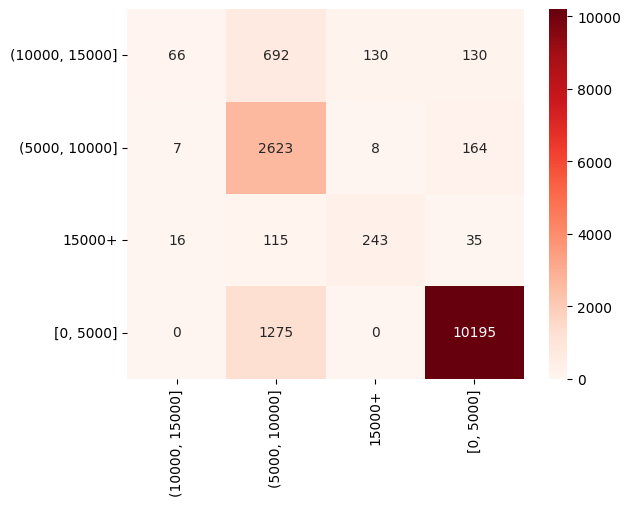

In [142]:
model_report(cnb, X_test, y_test)

In [143]:
model = cnb.named_steps['model']

In [144]:
model.class_log_prior_

array([-2.74477887, -1.73202006, -3.66064488, -0.31048009])

In [145]:
model.n_categories_

array([3, 8, 7, 5, 2, 2, 2, 2, 2, 2])

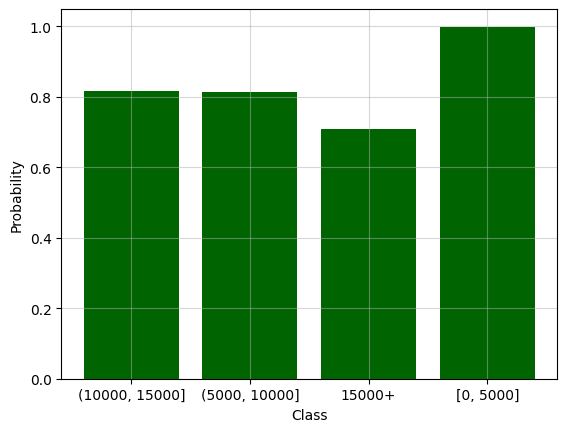

In [146]:
plot_predicted_probabilities(cnb, X_test)

#### Hyperparameter tuning

In [147]:
params = {
    'model__alpha' : [0, 0.5, 1.0],
    'model__fit_prior' : [True, False]
}

In [148]:
grid = GridSearchCV(cnb, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [ ]:
grid.fit(X_train, y_train)

In [150]:
grid.best_params_

{'model__alpha': 0, 'model__fit_prior': True}

In [151]:
cnb_cv = grid.best_estimator_

Izvestaj o CategoricalNB modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.8366137970571373
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.74      0.06      0.12      1018
 (5000, 10000]       0.56      0.94      0.70      2802
        15000+       0.65      0.59      0.62       409
     [0, 5000]       0.97      0.89      0.93     11470

      accuracy                           0.84     15699
     macro avg       0.73      0.62      0.59     15699
  weighted avg       0.87      0.84      0.83     15699

-------------------------------------------------------------------
Matrica konfuzije: 


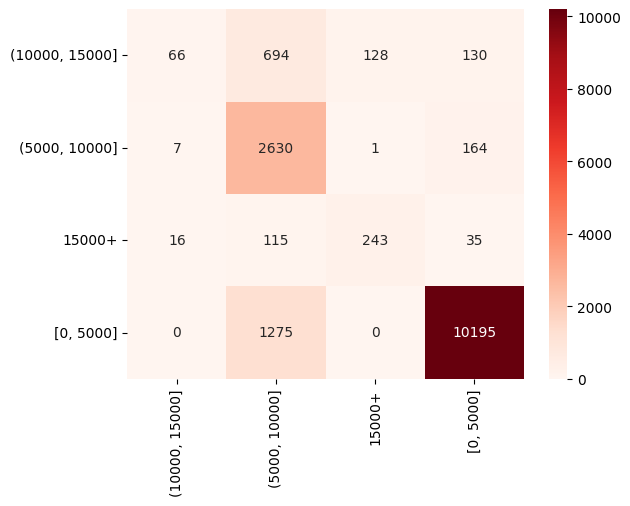

In [152]:
model_report(cnb_cv, X_test, y_test)

In [153]:
model = cnb_cv.named_steps['model']

In [154]:
model.class_log_prior_

array([-2.74477887, -1.73202006, -3.66064488, -0.31048009])

In [155]:
model.n_categories_

array([3, 8, 7, 5, 2, 2, 2, 2, 2, 2])

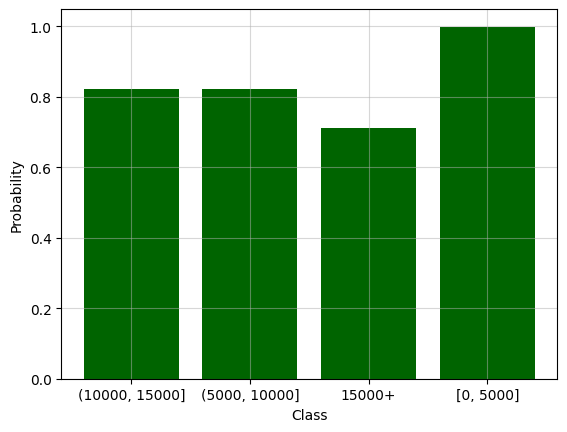

In [156]:
plot_predicted_probabilities(cnb_cv, X_test)

***

## Results:

In [157]:
model_names = ['cnb', 'cnb_cv']

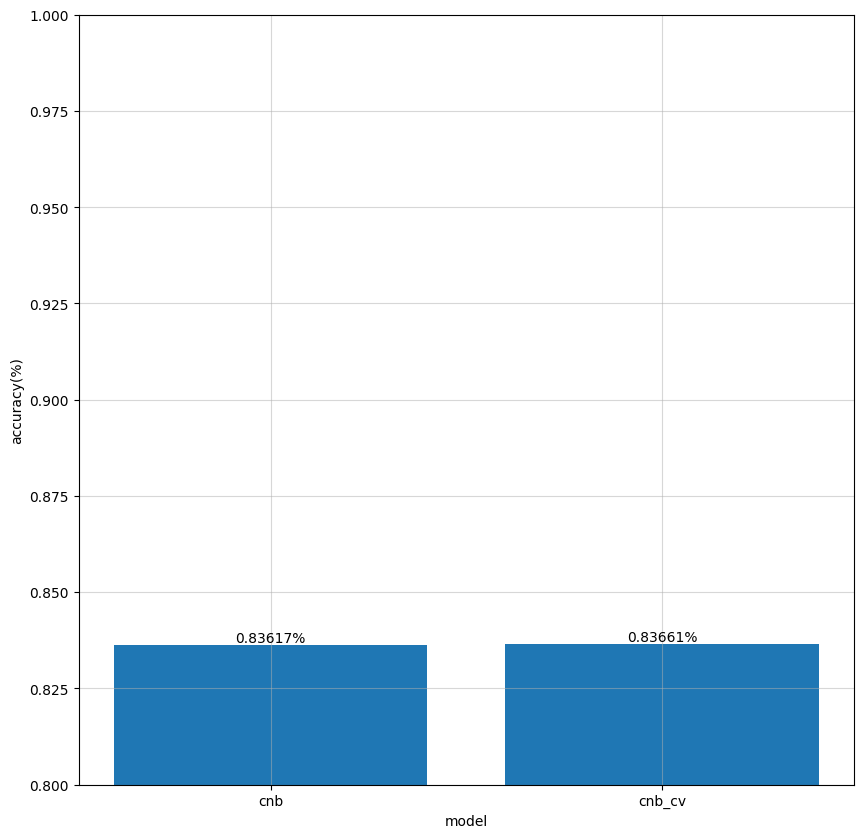

In [158]:
plt.figure(figsize=(10,10))
plt.bar(model_names, accuracy_scores)
plt.grid(alpha=0.5)
plt.ylim(0.8, 1.0)
for i, s in enumerate(accuracy_scores):
    plt.text(model_names[i], s, f'{s:.5f}%', ha='center', va='bottom')
plt.xlabel('model')
plt.ylabel('accuracy(%)')
plt.show()

Slabi rezultati i jednog i drugog modela u poredjenju sa prethodnima. izabracemo **cnb_cv** kao predstavnika **CategoricalNB**

In [159]:
joblib.dump(cnb_cv, 'CNB.pkl')

['CNB.pkl']